<a href="https://colab.research.google.com/github/EliasSf73/Data-Science/blob/main/Entropy_based_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
subject1_path='/content/drive/MyDrive/Data Science/13주차 자료/Subject 1 EEG.txt'
subject2_path= '/content/drive/MyDrive/Data Science/13주차 자료/Subject 2 EEG.txt'

**Load and Read the Data**

In [3]:
import pandas as pd
# Load the data
subject1_data = pd.read_csv(subject1_path, delim_whitespace=True, header=None)
subject2_data = pd.read_csv(subject2_path, delim_whitespace=True, header=None)

# Display the first few rows to verify
print("Subject A Data:")
print(subject1_data.head())
print("\nSubject B Data:")
print(subject2_data.head())

<ipython-input-3-fcfa626d6dfe>:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  subject1_data = pd.read_csv(subject1_path, delim_whitespace=True, header=None)
<ipython-input-3-fcfa626d6dfe>:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  subject2_data = pd.read_csv(subject2_path, delim_whitespace=True, header=None)


Subject A Data:
           0           1           2           3           4           5   \
0  123.512016  122.531479  127.504181  124.515892  123.021744  125.262962   
1  127.006134  122.515915  127.527527  123.488670  127.504181  127.006134   
2  125.519768  125.262962  127.473053  123.519798  123.457542  125.753227   
3  126.259056  125.006157  127.371887  120.523727  123.519798  127.441925   
4  126.515862  127.379669  127.473053  124.515892  121.519821  126.531425   

           6           7           8           9           10          11  \
0  123.457542  123.512016  128.492493  127.745422  128.492493  127.994446   
1  127.504181  125.511986  129.465240  127.527527  127.441925  127.745422   
2  125.262962  122.764938  128.679260  127.473053  127.994446  127.255157   
3  124.632622  123.270767  128.492493  127.013916  128.484711  125.535332   
4  127.379669  123.574272  127.441925  127.994446  126.531425  123.512016   

           12          13          14          15  
0  127

In [4]:
subject1_data.shape

(16384, 16)

In [6]:
from scipy.stats import skew
import numpy as np

# Calculate skewness for each channel
skew_subject1 = [skew(subject1_data[channel]) for channel in subject1_data.columns]
skew_subject2 = [skew(subject2_data[channel]) for channel in subject2_data.columns]

# Display skewness per channel
print("Skewness - Subject 1 (Raw Data):", skew_subject1)
print("Skewness - Subject 2 (Raw Data):", skew_subject2)

# Average skewness across all channels
avg_skew_subject1 = np.mean(skew_subject1)
avg_skew_subject2 = np.mean(skew_subject2)

print(f"\nAverage Skewness - Subject 1: {avg_skew_subject1}")
print(f"Average Skewness - Subject 2: {avg_skew_subject2}")


Skewness - Subject 1 (Raw Data): [-0.25363121015856943, -0.3853243029662104, 1.824020370574977, -0.4214794268019979, 0.2819066950320618, -0.41621001795479873, -0.5432105200292001, -0.22849902055150434, -0.15036456597325198, -0.1425213814713385, -0.05771661563481208, -0.4241319971062613, -0.3183338506003638, -0.12981129095132304, -0.3041369954230456, -0.4749412841799971]
Skewness - Subject 2 (Raw Data): [-0.04806116394197372, -0.07043530600184753, 2.061397460099157, 0.041167983081305336, 0.06621212798458709, 0.02334510652206991, 0.16331699636182379, 0.21808772382682567, -0.014967084312676857, -0.052405767026183624, 0.005849335561005715, -0.10631454627690187, 0.053869240077015344, -0.012208165536406603, 0.07683307848944072, 0.15518555878036158]

Average Skewness - Subject 1: -0.13402408838722724
Average Skewness - Subject 2: 0.16005453610547513


**Baseline correction/centering**

In [7]:
import numpy as np
subject1_data_centered= subject1_data- np.mean(subject1_data,axis=0)
subject2_data_centered= subject2_data- np.mean(subject2_data,axis=0)

print('centered data1:', subject1_data_centered.head)
print('centered data2:', subject2_data_centered.head)

centered data1: <bound method NDFrame.head of              0         1         2         3         4         5         6   \
0     -3.973399 -4.650784  0.057204 -3.099229 -4.453789 -2.043420 -3.924995   
1     -0.479281 -4.666348  0.080550 -4.126451  0.028648 -0.300248  0.121644   
2     -1.965647 -1.919301  0.026076 -4.095323 -4.017991 -1.553155 -2.119575   
3     -1.226359 -2.176106 -0.075090 -7.091394 -3.955735  0.135543 -2.749915   
4     -0.969553  0.197406  0.026076 -3.099229 -5.955712 -0.774957 -0.002868   
...         ...       ...       ...       ...       ...       ...       ...   
16379  0.260007  5.800449 -0.005052 -1.052568  3.950767  0.314529 -0.002868   
16380  1.007078  6.298496 -0.082872  0.130301  7.001319  1.186111  4.106019   
16381  2.820280  5.045596 -0.075090  2.885123  4.503303  1.201675  1.927064   
16382 -0.206912  4.275165  0.041640 -0.165414  2.013053 -0.276902  2.082703   
16383  3.754117  4.298511  0.049422  4.371497  4.728981  2.182204  2.176087   

     

In [8]:
# Define a threshold for artifact removal
threshold = 3 * np.std(subject1_data_centered)  # Example: 3 standard deviations

# Remove rows with values exceeding the threshold
subject1_data_cleaned = subject1_data_centered[(np.abs(subject1_data_centered) < threshold).all(axis=1)]
subject2_data_cleaned = subject2_data_centered[(np.abs(subject2_data_centered) < threshold).all(axis=1)]

print("Subject 1 cleaned data shape:", subject1_data_cleaned.shape)
print("Subject 2 cleaned data shape:", subject2_data_cleaned.shape)


Subject 1 cleaned data shape: (15197, 16)
Subject 2 cleaned data shape: (7192, 16)


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


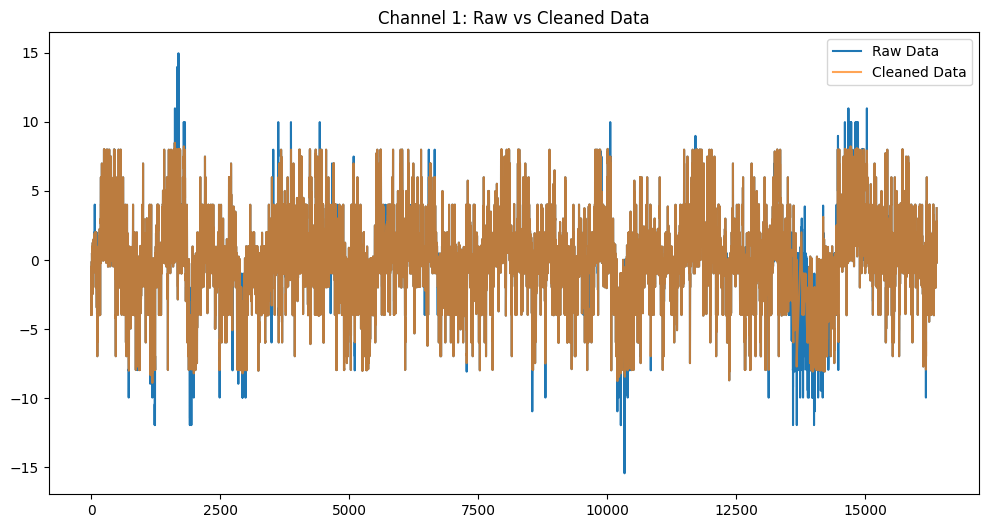

In [10]:
import matplotlib.pyplot as plt

# Plot raw vs cleaned data for a single channel
channel_to_plot = 0  # Example: First channel

plt.figure(figsize=(12, 6))
# plt.plot(subject1_data_centered[:, channel_to_plot], label='Raw Data')
# plt.plot(subject1_data_cleaned[:, channel_to_plot], label='Cleaned Data', alpha=0.7)
# plt.legend()
# plt.title("Channel 1: Raw vs Cleaned Data")
# plt.show()
plt.plot(subject1_data_centered.iloc[:, channel_to_plot], label='Raw Data')
plt.plot(subject1_data_cleaned.iloc[:, channel_to_plot], label='Cleaned Data', alpha=0.7)
plt.legend()
plt.title("Channel 1: Raw vs Cleaned Data")
plt.show()


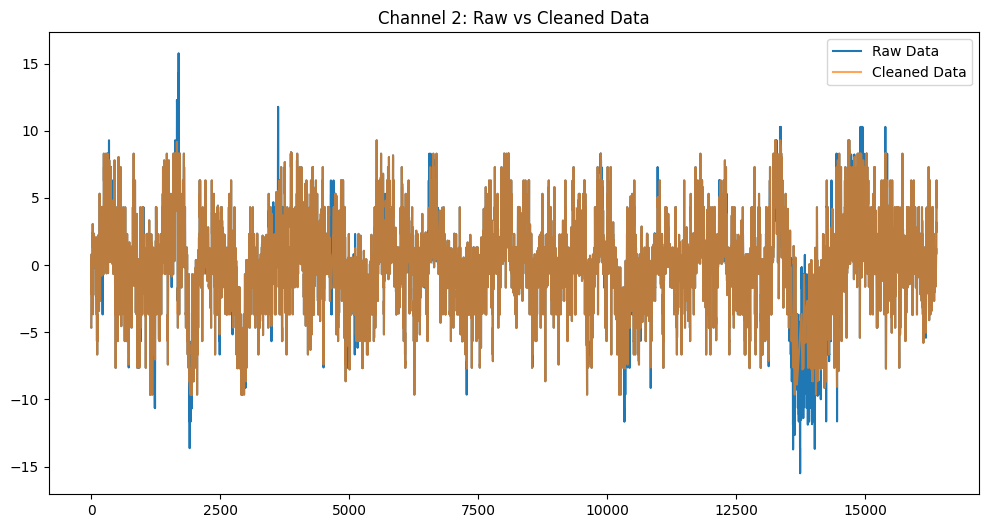

In [12]:
channel_to_plot = 1  # Change to inspect another channel
plt.figure(figsize=(12, 6))
# plt.plot(subject1_data_centered[:, channel_to_plot], label='Raw Data')
# plt.plot(subject1_data_cleaned[:, channel_to_plot], label='Cleaned Data', alpha=0.7)
# plt.legend()
# plt.title(f"Channel {channel_to_plot + 1}: Raw vs Cleaned Data")
# plt.show()
plt.plot(subject1_data_centered.iloc[:, channel_to_plot], label='Raw Data')
plt.plot(subject1_data_cleaned.iloc[:, channel_to_plot], label='Cleaned Data', alpha=0.7)
plt.legend()
plt.title(f"Channel {channel_to_plot + 1}: Raw vs Cleaned Data")
plt.show()


In [14]:
!pip install pyentrp


**Compute Entropy (sample entropy)**

In [16]:
from pyentrp import entropy as ent
# define a entropy calculating function
def calculate_entropy(data, m=2,r=0.2):
  sample_entropies={}
  for channel in data.columns:
    sample_entropies[channel]= ent.sample_entropy(data[channel],m,r*np.std(data[channel]))
  return sample_entropies

#
subject1_entropy= calculate_entropy(subject1_data_cleaned)
subject2_entropy= calculate_entropy(subject2_data_cleaned)
# print the entropies
print('subject1_entropy:', subject1_entropy)
print('subject2_entropy:', subject2_entropy)

subject1_entropy: {0: array([1.80260232, 1.3634768 ]), 1: array([1.90876411, 1.23626407]), 2: array([2.03194553, 1.96218352]), 3: array([2.04532211, 1.39598811]), 4: array([1.97442756, 1.28064363]), 5: array([1.82688369, 1.34937963]), 6: array([1.89790608, 1.37806611]), 7: array([1.81993361, 1.32237679]), 8: array([1.90675498, 1.27901217]), 9: array([1.94859142, 1.25076343]), 10: array([1.98990118, 1.25807701]), 11: array([1.99109414, 1.3218594 ]), 12: array([2.0322688 , 1.13661395]), 13: array([1.84134995, 1.28634907]), 14: array([1.73850769, 1.27920224]), 15: array([1.89607145, 1.29162229])}
subject2_entropy: {0: array([2.17975967, 0.82412506]), 1: array([2.21634394, 0.82826146]), 2: array([1.59089813, 1.48021715]), 3: array([2.21618253, 0.73105639]), 4: array([2.17577116, 0.75563791]), 5: array([2.23935507, 0.8356056 ]), 6: array([2.17307238, 0.75571329]), 7: array([2.22670719, 0.73354425]), 8: array([2.00224502, 0.81922705]), 9: array([2.21411851, 0.79363664]), 10: array([1.9846506

In [37]:
subject1_entropy_without_ch2 = calculate_entropy(subject1_data.drop(columns=[2]))
subject2_entropy_without_ch2 = calculate_entropy(subject1_data.drop(columns=[2]))



In [38]:
print('subject1_entropy_without_ch2:', subject1_entropy_without_ch2)
print('subject2_entropy_without_ch2:', subject2_entropy_without_ch2)

subject1_entropy_without_ch2: {0: array([1.78485755, 1.31811403]), 1: array([1.9087019 , 1.17898487]), 3: array([1.98043184, 1.28202262]), 4: array([1.91475593, 1.15661844]), 5: array([1.79630339, 1.27895178]), 6: array([1.79134803, 1.22608607]), 7: array([1.8258856 , 1.27748319]), 8: array([1.94137182, 1.28085241]), 9: array([2.00108936, 1.24233957]), 10: array([1.95089716, 1.1624038 ]), 11: array([1.93480171, 1.21156409]), 12: array([1.98524808, 1.04643496]), 13: array([1.84094979, 1.2405806 ]), 14: array([1.72394753, 1.21157825]), 15: array([1.90100027, 1.24073187])}
subject2_entropy_without_ch2: {0: array([1.78485755, 1.31811403]), 1: array([1.9087019 , 1.17898487]), 3: array([1.98043184, 1.28202262]), 4: array([1.91475593, 1.15661844]), 5: array([1.79630339, 1.27895178]), 6: array([1.79134803, 1.22608607]), 7: array([1.8258856 , 1.27748319]), 8: array([1.94137182, 1.28085241]), 9: array([2.00108936, 1.24233957]), 10: array([1.95089716, 1.1624038 ]), 11: array([1.93480171, 1.211564

In [17]:
# do aggregation
average_entropy_1= np.mean(list(subject1_entropy.values()))
average_entropy_2= np.mean(list(subject2_entropy.values()))
print('average_entropy_1:', average_entropy_1)
print('average_entropy_2:', average_entropy_2)

average_entropy_1: 1.6263813390752104
average_entropy_2: 1.4467822605941232


In [21]:
import numpy as np

# Compute standard deviation of entropy values
std_entropy_subject1 = np.std(list(subject1_entropy.values()))
std_entropy_subject2 = np.std(list(subject2_entropy.values()))

print("Standard Deviation (Subject 1):", std_entropy_subject1)
print("Standard Deviation (Subject 2):", std_entropy_subject2)


Standard Deviation (Subject 1): 0.3202972298857608
Standard Deviation (Subject 2): 0.6888509108813261


In [19]:
# Extract first entropy values for each channel
subject1_entropy_values = [value[0] for value in subject1_entropy.values()]
subject2_entropy_values = [value[0] for value in subject2_entropy.values()]

print("Subject 1 - First Entropy Values:", subject1_entropy_values)
print("Subject 2 - First Entropy Values:", subject2_entropy_values)


Subject 1 - First Entropy Values: [1.802602317849966, 1.9087641122567158, 2.0319455345208595, 2.0453221121566227, 1.9744275579255424, 1.8268836908110884, 1.8979060838255675, 1.819933612939794, 1.9067549766987133, 1.9485914190887819, 1.9899011801031024, 1.9910941365538561, 2.032268802154118, 1.841349953179955, 1.7385076872309486, 1.8960714540662802]
Subject 2 - First Entropy Values: [2.1797596701544566, 2.216343936350157, 1.590898127378213, 2.216182532712833, 2.1757711576387404, 2.2393550705334273, 2.173072376132936, 2.226707185315365, 2.0022450216950194, 2.214118509730444, 1.9846506651054525, 2.203821877745017, 1.9381402936352883, 2.1997496860019603, 1.947251402355179, 2.2501494377966327]


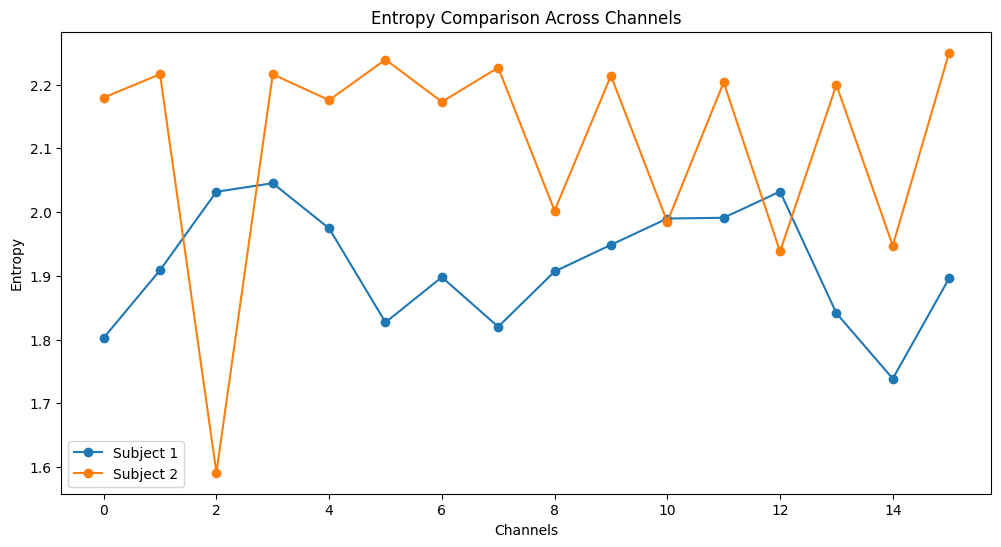

In [22]:
import matplotlib.pyplot as plt

# Extract first entropy values for each channel
subject1_entropy_values = [value[0] for value in subject1_entropy.values()]
subject2_entropy_values = [value[0] for value in subject2_entropy.values()]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(subject1_entropy_values, label='Subject 1', marker='o')
plt.plot(subject2_entropy_values, label='Subject 2', marker='o')
plt.title("Entropy Comparison Across Channels")
plt.xlabel("Channels")
plt.ylabel("Entropy")
plt.legend()
plt.show()


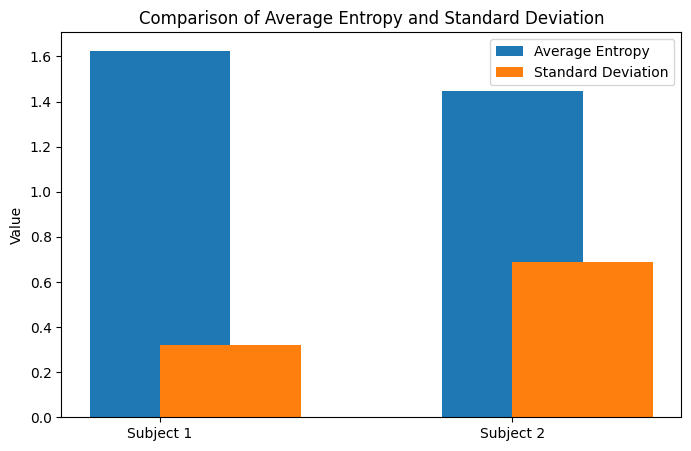

In [23]:
# Plot average entropy and standard deviation
import matplotlib.pyplot as plt
labels = ['Subject 1', 'Subject 2']
avg_entropy = [1.626, 1.447]
std_deviation = [0.320, 0.689]

x = range(len(labels))
plt.figure(figsize=(8, 5))
plt.bar(x, avg_entropy, width=0.4, label='Average Entropy', align='center')
plt.bar(x, std_deviation, width=0.4, label='Standard Deviation', align='edge')
plt.xticks(x, labels)
plt.ylabel("Value")
plt.title("Comparison of Average Entropy and Standard Deviation")
plt.legend()
plt.show()


In [30]:
median_entropy_subject1 = np.median(subject1_entropy_values)
median_entropy_subject2 = np.median(subject2_entropy_values)
print(f"Median Entropy - Subject 1: {median_entropy_subject1}")
print(f"Median Entropy - Subject 2: {median_entropy_subject2}")


Median Entropy - Subject 1: 1.9117289121500889
Median Entropy - Subject 2: 2.121912944449105


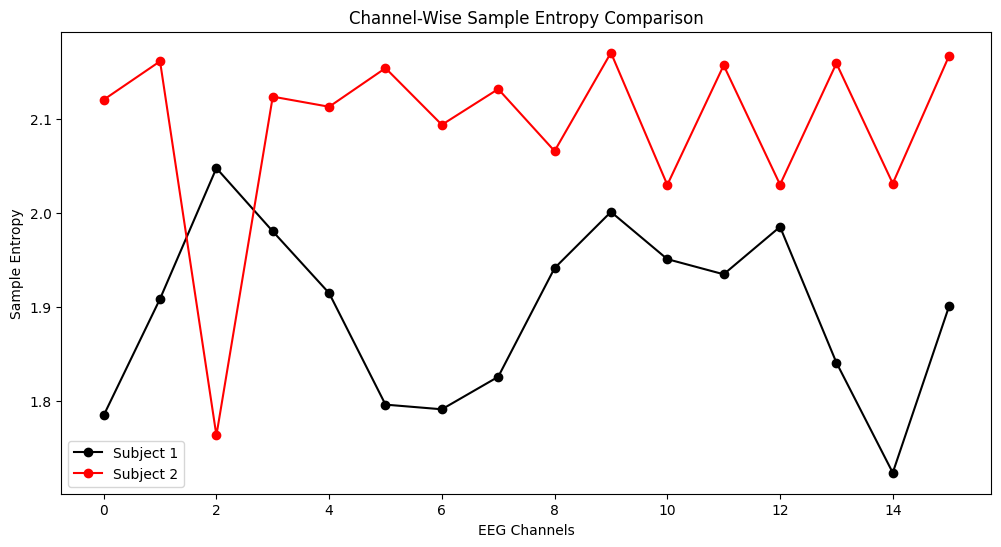

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(range(16), subject1_entropy_values, marker='o', label='Subject 1', color='black')
plt.plot(range(16), subject2_entropy_values, marker='o', label='Subject 2', color='red')
plt.xlabel('EEG Channels')
plt.ylabel('Sample Entropy')
plt.title('Channel-Wise Sample Entropy Comparison')
plt.legend()
plt.show()


In [24]:
subject1_data_cleaned_without_ch2 = subject1_data_cleaned.drop(columns=[2])
subject2_data_cleaned_without_ch2 = subject2_data_cleaned.drop(columns=[2])


In [26]:
cleaned_entropy_subject1_no_ch2 = calculate_entropy(subject1_data_cleaned_without_ch2)
cleaned_entropy_subject2_no_ch2 = calculate_entropy(subject2_data_cleaned_without_ch2)


In [27]:
avg_entropy_subject1_no_ch2 = np.mean(list(cleaned_entropy_subject1_no_ch2.values()))
avg_entropy_subject2_no_ch2 = np.mean(list(cleaned_entropy_subject2_no_ch2.values()))

std_entropy_subject1_no_ch2 = np.std(list(cleaned_entropy_subject1_no_ch2.values()))
std_entropy_subject2_no_ch2 = np.std(list(cleaned_entropy_subject2_no_ch2.values()))

print("Average Entropy (Subject 1, no Channel 2):", avg_entropy_subject1_no_ch2)
print("Average Entropy (Subject 2, no Channel 2):", avg_entropy_subject2_no_ch2)
print("Standard Deviation (Subject 1, no Channel 2):", std_entropy_subject1_no_ch2)
print("Standard Deviation (Subject 2, no Channel 2):", std_entropy_subject2_no_ch2)


Average Entropy (Subject 1, no Channel 2): 1.6016691265255032
Average Entropy (Subject 2, no Channel 2): 1.4408639020263327
Standard Deviation (Subject 1, no Channel 2): 0.3155589680880707
Standard Deviation (Subject 2, no Channel 2): 0.7109045972917417


In [33]:
# Isolate T3 and T4 channels
subject1_T3_T4 = subject1_data_cleaned[[6, 8]]
subject2_T3_T4 = subject2_data_cleaned[[6, 8]]


In [34]:
# Compute entropy for T3 and T4 channels
subject1_T3_T4_entropy = calculate_entropy(subject1_T3_T4)
subject2_T3_T4_entropy = calculate_entropy(subject2_T3_T4)

print("Subject 1 - T3 and T4 Entropy:", subject1_T3_T4_entropy)
print("Subject 2 - T3 and T4 Entropy:", subject2_T3_T4_entropy)


Subject 1 - T3 and T4 Entropy: {6: array([1.89790608, 1.37806611]), 8: array([1.90675498, 1.27901217])}
Subject 2 - T3 and T4 Entropy: {6: array([2.17307238, 0.75571329]), 8: array([2.00224502, 0.81922705])}


In [35]:
# Average entropy for T3 and T4
avg_entropy_subject1_T3_T4 = np.mean(list(subject1_T3_T4_entropy.values()))
avg_entropy_subject2_T3_T4 = np.mean(list(subject2_T3_T4_entropy.values()))

print("Average Entropy - Subject 1 (T3, T4):", avg_entropy_subject1_T3_T4)
print("Average Entropy - Subject 2 (T3, T4):", avg_entropy_subject2_T3_T4)


Average Entropy - Subject 1 (T3, T4): 1.6154348347087022
Average Entropy - Subject 2 (T3, T4): 1.4375644358458577


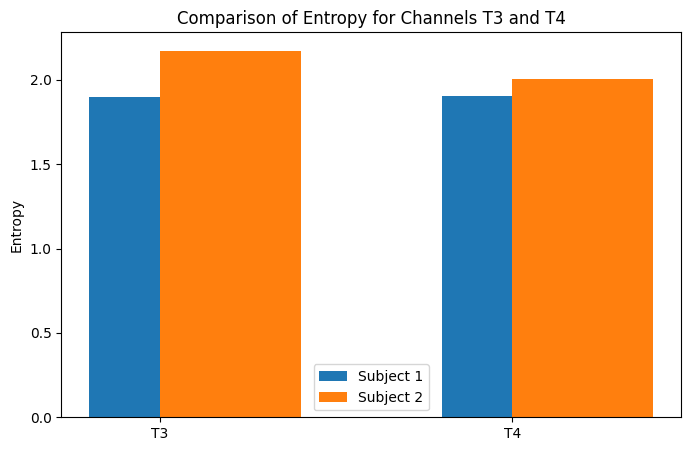

In [37]:
import matplotlib.pyplot as plt




# Extract the FIRST entropy value from each channel's entropy array
subject1_T3_entropy = subject1_T3_T4_entropy[6][0]  # Access the first element [0]
subject1_T4_entropy = subject1_T3_T4_entropy[8][0]  # Access the first element [0]
subject2_T3_entropy = subject2_T3_T4_entropy[6][0]  # Access the first element [0]
subject2_T4_entropy = subject2_T3_T4_entropy[8][0]  # Access the first element [0]

# Plot entropy for T3 and T4
channels = ['T3', 'T4']
entropy_subject1 = [subject1_T3_entropy, subject1_T4_entropy]
entropy_subject2 = [subject2_T3_entropy, subject2_T4_entropy]

plt.figure(figsize=(8, 5))
plt.bar(channels, entropy_subject1, width=0.4, label='Subject 1', align='center')
plt.bar(channels, entropy_subject2, width=0.4, label='Subject 2', align='edge')
plt.ylabel("Entropy")
plt.title("Comparison of Entropy for Channels T3 and T4")
plt.legend()
plt.show()

**Trial2: compute Approximate Entropy**

In [38]:
!pip install antropy  # Install the 'antropy' package

from antropy import app_entropy

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 1.7 MB/s eta 0:00:00
  Created wheel for antropy: filename=antropy-0.1.6-py3-none-any.whl size=16877 sha256=f049201383dbd5fa81ad2978b01224322b06cf81bc01c878c52ab71ffa696110
  Stored in directory: /root/.cache/pip/wheels/98/22/06/e91d7bb213c7133d5e2eb34258623e1e19928d5f05e1ee6812
Successfully built antropy


In [39]:
# Function to calculate Approximate Entropy for all channels
def calculate_approximate_entropy(data, m=2, r=0.2):
    approximate_entropy = {}
    for channel in data.columns:  # Iterate through each EEG channel
        #approximate_entropy[channel] = app_entropy(data[channel], m, r * np.std(data[channel]))
        approximate_entropy[channel] = app_entropy(data[channel], order=m, metric='chebyshev')
    return approximate_entropy

# # Compute Approximate Entropy for Subject 1 and Subject 2
# subject1_apen = calculate_approximate_entropy(subject1_data_centered)
# subject2_apen = calculate_approximate_entropy(subject2_data_centered)

# # Display results
# print("Approximate Entropy - Subject 1:")
# print(subject1_apen)

# print("\nApproximate Entropy - Subject 2:")
# print(subject2_apen)


Approximate Entropy - Subject 1: {0: 1.5288894694280142, 1: 1.4270580637439632, 2: 2.05870570128958, 3: 1.560035954348014, 4: 1.4745146166706684, 5: 1.4805552439745968, 6: 1.5453025741614854, 7: 1.4735580891520206, 8: 1.4360530137874084, 9: 1.4471415316549412, 10: 1.487686362068592, 11: 1.5079342291600906, 12: 1.3451096935497397, 13: 1.4393557038983413, 14: 1.4545562975366968, 15: 1.4304864253717966}
Approximate Entropy - Subject 2: {0: 0.9489891536456518, 1: 0.9327198939495616, 2: 1.5870450648408654, 3: 0.8933827727234642, 4: 0.9495528853433384, 5: 0.9416871387912442, 6: 0.9426182239516483, 7: 0.8783769716716514, 8: 1.1059171710188895, 9: 0.9568795343338969, 10: 0.9263040802535385, 11: 0.8945311499364608, 12: 0.8385902999057331, 13: 0.9972418088809611, 14: 0.8571634436587212, 15: 0.8163271378620505}
Average ApEn - Subject 1: 1.5060589356122467
Average ApEn - Subject 2: 0.9667079206729798
Standard Deviation of ApEn - Subject 1: 0.15140323872976824
Standard Deviation of ApEn - Subject 2

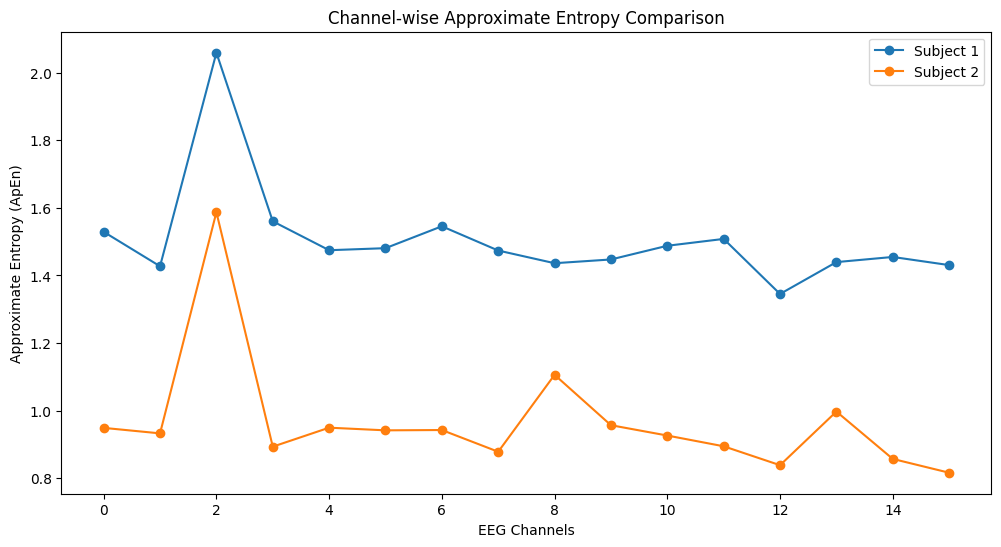

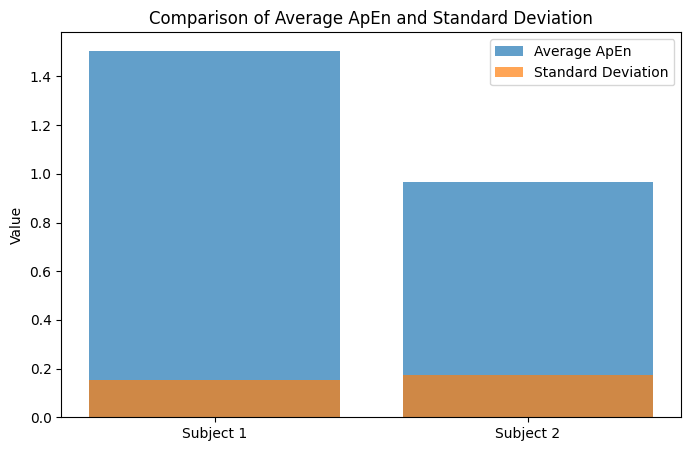

In [40]:
# Compute ApEn for all channels
subject1_apen = calculate_approximate_entropy(subject1_data_cleaned)
subject2_apen = calculate_approximate_entropy(subject2_data_cleaned)

# Print channel-wise ApEn
print("Approximate Entropy - Subject 1:", subject1_apen)
print("Approximate Entropy - Subject 2:", subject2_apen)

# Aggregate ApEn values across all channels
average_apen_subject1 = np.mean(list(subject1_apen.values()))
average_apen_subject2 = np.mean(list(subject2_apen.values()))
std_apen_subject1 = np.std(list(subject1_apen.values()))
std_apen_subject2 = np.std(list(subject2_apen.values()))

print("Average ApEn - Subject 1:", average_apen_subject1)
print("Average ApEn - Subject 2:", average_apen_subject2)
print("Standard Deviation of ApEn - Subject 1:", std_apen_subject1)
print("Standard Deviation of ApEn - Subject 2:", std_apen_subject2)

# Extract ApEn values for plotting
subject1_apen_values = [value for value in subject1_apen.values()]
subject2_apen_values = [value for value in subject2_apen.values()]

# Plot ApEn across channels
channels = range(16)
plt.figure(figsize=(12, 6))
plt.plot(channels, subject1_apen_values, marker='o', label='Subject 1')
plt.plot(channels, subject2_apen_values, marker='o', label='Subject 2')
plt.xlabel("EEG Channels")
plt.ylabel("Approximate Entropy (ApEn)")
plt.title("Channel-wise Approximate Entropy Comparison")
plt.legend()
plt.show()

# Plot Average ApEn and Standard Deviation
plt.figure(figsize=(8, 5))
plt.bar(['Subject 1', 'Subject 2'], [average_apen_subject1, average_apen_subject2], label='Average ApEn', alpha=0.7)
plt.bar(['Subject 1', 'Subject 2'], [std_apen_subject1, std_apen_subject2], label='Standard Deviation', alpha=0.7)
plt.ylabel("Value")
plt.title("Comparison of Average ApEn and Standard Deviation")
plt.legend()
plt.show()


Subject 1 - T3 and T4 ApEn: {6: 1.5453025741614854, 8: 1.4360530137874084}
Subject 2 - T3 and T4 ApEn: {6: 0.9426182239516483, 8: 1.1059171710188895}
Average ApEn - Subject 1 (T3, T4): 1.4906777939744469
Average ApEn - Subject 2 (T3, T4): 1.024267697485269


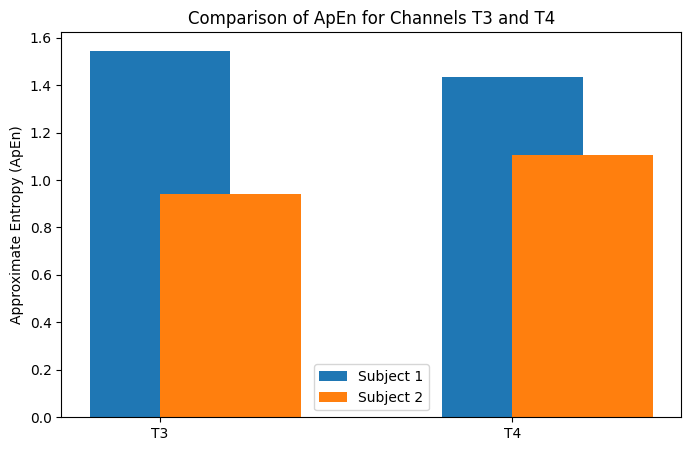

In [41]:
# Compute ApEn for T3 and T4
subject1_T3_T4_apen = calculate_approximate_entropy(subject1_data_cleaned[[6, 8]])
subject2_T3_T4_apen = calculate_approximate_entropy(subject2_data_cleaned[[6, 8]])

# Print results
print("Subject 1 - T3 and T4 ApEn:", subject1_T3_T4_apen)
print("Subject 2 - T3 and T4 ApEn:", subject2_T3_T4_apen)

# Compute averages
avg_apen_subject1_T3_T4 = np.mean(list(subject1_T3_T4_apen.values()))
avg_apen_subject2_T3_T4 = np.mean(list(subject2_T3_T4_apen.values()))

print("Average ApEn - Subject 1 (T3, T4):", avg_apen_subject1_T3_T4)
print("Average ApEn - Subject 2 (T3, T4):", avg_apen_subject2_T3_T4)

# Visualize the results
channels = ['T3', 'T4']
apen_subject1 = [subject1_T3_T4_apen[6], subject1_T3_T4_apen[8]]
apen_subject2 = [subject2_T3_T4_apen[6], subject2_T3_T4_apen[8]]

plt.figure(figsize=(8, 5))
plt.bar(channels, apen_subject1, width=0.4, label='Subject 1', align='center')
plt.bar(channels, apen_subject2, width=0.4, label='Subject 2', align='edge')
plt.ylabel("Approximate Entropy (ApEn)")
plt.title("Comparison of ApEn for Channels T3 and T4")
plt.legend()
plt.show()


In [19]:
# Aggregate entropy values
avg_apen_subject1 = np.mean(list(subject1_apen.values()))
avg_apen_subject2 = np.mean(list(subject2_apen.values()))

print(f"\nAverage Approximate Entropy - Subject 1: {avg_apen_subject1}")
print(f"Average Approximate Entropy - Subject 2: {avg_apen_subject2}")



Average Approximate Entropy - Subject 1: 1.4436025919946485
Average Approximate Entropy - Subject 2: 0.6360956426534835


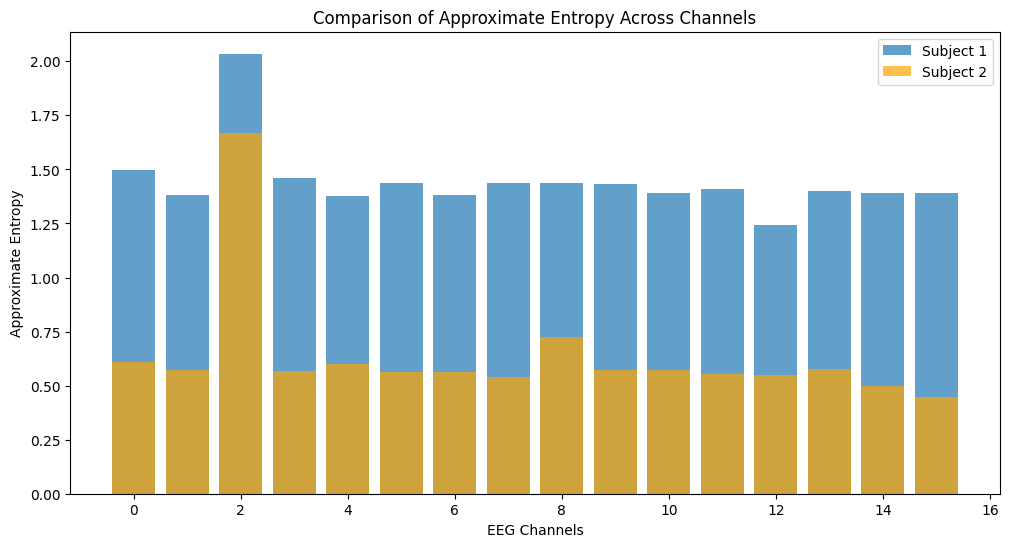

In [20]:
plt.figure(figsize=(12, 6))
plt.bar(range(16), subject1_apen.values(), alpha=0.7, label='Subject 1')
plt.bar(range(16), subject2_apen.values(), alpha=0.7, label='Subject 2', color='orange')
plt.xlabel('EEG Channels')
plt.ylabel('Approximate Entropy')
plt.title('Comparison of Approximate Entropy Across Channels')
plt.legend()
plt.show()
